# Event Detection Via Social Media Data
----
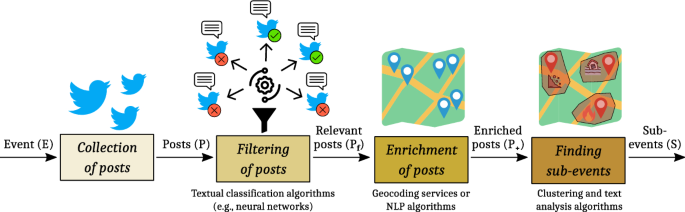

```
[Belcastro, L., Marozzo, F., Talia, D. et al. Using social media for sub-event detection during disasters. J Big Data 8, 79 (2021). https://doi.org/10.1186/s40537-021-00467-1]

```




## Table of Content

1. **Introduction**

   * Overview of the dataset
   * Purpose and objectives

2. **Background**

   * Event detection on Twitter
   * Challenges in creating event detection corpora
   * Importance of this dataset for research

3. **Dataset Overview**

   * Structure of the dataset
   * Key features (tweets, event annotations, etc.)
   * Sample data exploration

4. **Data Preprocessing**

   * Handling missing data
   * Cleaning and filtering data
   * Feature extraction and transformation

5. **Exploratory Data Analysis (EDA)**

   * Distribution of events in the dataset
   * Frequency of tweets by event
   * Top hashtags and entities in events
   * Visualizing tweet data (e.g., word clouds, graphs)

6. **Event Detection in Twitter**

   * Understanding the definition of events
   * Applying basic event detection methods

7. **Data Visualizations**

   * Graphs and plots to visualize relationships between entities, hashtags, and events
   * Network visualizations (e.g., Tweet and user interactions)

8. **Conclusion**

   * Key insights from the data analysis
   * Potential applications of event detection models
   * Next steps in research

9. **References**

   * Academic papers, tools, and methodologies used

## Introduction


---

### Introduction

This notebook presents an exploratory data analysis (EDA) of the dataset **"Building a Large-scale Corpus for Evaluating Event Detection on Twitter"** by Andrew J. McMinn. The dataset is designed to address the challenge of event detection on Twitter, a rapidly growing platform where users post millions of tweets daily. Despite its popularity, there are very few publicly available corpora suitable for large-scale event detection tasks, mainly due to the difficulty of creating relevance judgments at such a large scale. This dataset contains over 120 million tweets and provides relevance judgments for over 68,480 tweets covering more than 500 events.

Event detection, the task of identifying and tracking real-world events as they unfold on Twitter, is critical for applications ranging from disaster response to social media monitoring.
This dataset aims to bridge that gap by providing a comprehensive and large-scale test collection, along with a novel methodology for creating relevance judgments using crowdsourcing, Wikipedia, and state-of-the-art event detection approaches.

### Background

Social media platforms like Twitter generate vast amounts of real-time data, providing insights into ongoing events around the world. However, existing corpora for event detection tasks are either too small or lack the necessary annotations for evaluating event detection systems. Many existing datasets also face issues such as geographical bias or are not designed for event-based analysis.

This dataset provides a valuable resource for researchers working on event detection systems, allowing for the development and comparison of algorithms that can detect and track events on Twitter in real time.

---

##Data Overview

In [47]:
#@title Install Packages
!pip install arabic-reshaper python-bidi
!pip install ar_wordcloud
!pip install transformers
!pip install stanza --quiet

import nltk
import stanza

nltk.download('stopwords')
from nltk.corpus import stopwords

arabic_stopwords = set(stopwords.words('arabic'))


# Download Arabic model once
stanza.download('ar', verbose=False)

# Initialize pipeline for Arabic with NER
nlp = stanza.Pipeline('ar', processors='tokenize,ner', use_gpu=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 29.1 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
#@title import packages
import numpy as np
import requests
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import pandas as pd
#@title import packages
import numpy as np
import requests
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import random
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
from collections import Counter

import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from collections import Counter
import ast
import arabic_reshaper
from bidi.algorithm import get_display
from ar_wordcloud import ArabicWordCloud

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import random
import networkx as nx


In [63]:
#@title uitlities
import re

def clean_tweet(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'http\S+', '', text)            # remove URLs
    text = re.sub(r'@\w+', '', text)                # remove mentions
    text = re.sub(r'#\w+', '', text)                # remove hashtags
    text = re.sub(r'[^ء-يa-zA-Z0-9\s]', ' ', text) # keep Arabic letters, Latin letters, numbers, and spaces only
    text = re.sub(r'\s+', ' ', text)                 # remove extra whitespace
    return text.strip()

def extract_entities_stanza(text):
    if not isinstance(text, str) or text.strip() == "":
        return []
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return entities




In [4]:
# @title Define Constants
urls = [
    "https://raw.githubusercontent.com/HasanKhadd0ur/SocialED_datasets/main/npy_data/Event2012.npy"
]
from google.colab import drive
drive.mount('/content/drive')

columns=[ 'tweet_id', 'text', 'event_id', 'words', 'filtered_words', 'entities', 'user_id', 'created_at', 'urls', 'hashtags', 'user_mentions']

Mounted at /content/drive


In [9]:
#@title process data
# import os
# import pandas as pd

# # Define folder path in your Drive
# folder_path = '/content/drive/MyDrive/Events'

# # List CSV files only
# csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
# dataframes = []

# for label, filename in enumerate(csv_files):
#     file_path = os.path.join(folder_path, filename)
#     try:
#         df = pd.read_csv(file_path)
#         df['event_label'] = label  # Numeric label for each file
#         df['event_filename'] = filename  # Optional: store filename
#         dataframes.append(df)
#     except Exception as e:
#         print(f"Error reading {filename}: {e}")
# merged_df = pd.concat(dataframes, ignore_index=True)

# # Optional: Save to Drive or download
# merged_df.to_csv('/content/drive/MyDrive/merged_labeled_events.csv', index=False)

In [115]:
#@title Load dataset
df = pd.read_csv("/content/drive/MyDrive/merged_labeled_events.csv")

In [106]:
#@title Data Columns
df.columns

Index(['Tweet ID', 'Tweet Text', 'Type', 'Author Name', 'Author Username',
       'Creation Time', 'Reply Count', 'Retweet Count', 'Quote Count',
       'Like Count', 'View Count', 'Bookmark Count', 'Language',
       'Possibly Sensitive', 'Source', 'Hashtags', 'Tweet URL', 'Media Type',
       'Media URLs', 'External URLs', 'event_label', 'event_filename',
       'Old Tweet Text', 'Named Entities'],
      dtype='object')

In [148]:
# @title Ensure Type
# Ensure datetime format
df['Creation Time'] = pd.to_datetime(df['Creation Time'])
import ast

def entities_to_list(entities_str):
    if isinstance(entities_str, str):
        try:
            # Safely evaluate the string to a Python list
            entities = ast.literal_eval(entities_str)
            # Ensure it's a list and strip whitespace from each entity
            if isinstance(entities, list):
                return [e.strip() for e in entities]
            else:
                return []
        except (ValueError, SyntaxError):
            return []
    else:
        return []

# Apply to the Named Entities column
df['Named Entities'] = df['Named Entities'].apply(entities_to_list)



In [117]:
#@title Ensure hashtags are stored as lists instead of comma-separated strings
# def convert_hashtags_to_list(value):
#     if isinstance(value, str):
#         return [tag.strip() for tag in value.split(',') if tag.strip()]
#     return []

# df['Hashtags'] = df['Hashtags'].apply(convert_hashtags_to_list)
# Convert the string of hashtags separated by commas into a list, handling NaN

def hashtags_to_list(hstring):
    if isinstance(hstring, str):
        # Split by comma, strip whitespace
      return [tag.strip().lstrip('#') for tag in hstring.split(',') if tag.strip()]

    else:
        # For NaN or missing values
        return []
df['Hashtags_str'] = df['Hashtags']

# Apply conversion to your hashtag column, e.g., 'Hashtags_str'
df['Hashtags'] = df['Hashtags'].apply(hashtags_to_list)



,Tweet Text,Hashtags
0,تصاعد في حوادث الخطف والقتل بحق مدنيين من الطا...,"[سوريا, حمص, مصياف, جبلة, اللاذقية, طرطوس, حما..."
1,حبر على ورق وعود حكومية بمحاسبة المسؤولين عن ح...,[حمص]
2,للمعلومة طريق دير الزور الذي يصلها بحمص ودمشق ...,[]
3,أهم أحداث الجزيرة خلال الساعات الماضية حادث جد...,[]
4,كل المحافظات كوم وضع محافظة حمص بكوم ثاني الوض...,[]


In [16]:
# @title Data shape
print(df.shape)


(8380, 22)


In [64]:
#@title Clean the tweet texts
df['Old Tweet Text'] = df['Tweet Text']
df['Tweet Text'] = df['Tweet Text'].apply(clean_tweet)


## Explore Dataset

In [17]:
#@title Some Sampels From the Dataset
df.sample(2)

,Tweet ID,Tweet Text,Type,Author Name,Author Username,Creation Time,Reply Count,Retweet Count,Quote Count,Like Count,...,Language,Possibly Sensitive,Source,Hashtags,Tweet URL,Media Type,Media URLs,External URLs,event_label,event_filename
2370,"=""1924096279249870863""",حل الحـ،،زب وتشكيل الفرقة 84 التابعة لـ وزارة ...,Tweet,حذيفة AL,Ha_000ha,2025-05-18 16:34:35,11,22,5,630,...,ar,No,Twitter for Android,NaN,https://x.com/Ha_000ha/status/1924096279249870863,NaN,NaN,NaN,14,TwSearchExporter-وزارة الدفاع السوريةlangar un...
1106,"=""1915740748437221854""",الذيول راخ تنفتح الحدود وراح اطالبكم سوريا بتع...,Tweet,خالد الأسلمي الشمري,asdaslm9,2025-04-25 15:12:41,0,0,0,0,...,ar,No,Twitter for Android,NaN,https://x.com/asdaslm9/status/1915740748437221854,NaN,NaN,NaN,7,TwSearchExporter-طريق دير الزور until2025-05-2...


In [18]:
# @title Check for missing values
# Basic DataFrame info
df.info()

# Check for missing values
print("\nMissing values per column:\n", df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8380 entries, 0 to 8379
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tweet ID            8380 non-null   object        
 1   Tweet Text          8380 non-null   object        
 2   Type                8380 non-null   object        
 3   Author Name         5274 non-null   object        
 4   Author Username     5274 non-null   object        
 5   Creation Time       8380 non-null   datetime64[ns]
 6   Reply Count         8380 non-null   int64         
 7   Retweet Count       8380 non-null   int64         
 8   Quote Count         8380 non-null   int64         
 9   Like Count          8380 non-null   int64         
 10  View Count          8233 non-null   float64       
 11  Bookmark Count      8380 non-null   int64         
 12  Language            8380 non-null   object        
 13  Possibly Sensitive  8380 non-null   object      

In [19]:
# @title Describe the data
df.describe()

,Creation Time,Reply Count,Retweet Count,Quote Count,Like Count,View Count,Bookmark Count,event_label
count,8380,8380.000000,8380.000000,8380.000000,8380.000000,8.233000e+03,8380.000000,8380.000000
mean,2025-04-01 12:45:57.575895040,10.854893,21.032697,1.980310,149.818496,1.150253e+04,6.959547,46.556683
min,2013-02-16 20:23:59,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2025-05-13 19:54:20,0.000000,0.000000,0.000000,0.000000,6.000000e+01,0.000000,13.000000
50%,2025-05-21 19:04:08.500000,0.000000,0.000000,0.000000,2.000000,2.210000e+02,0.000000,41.000000
75%,2025-05-25 11:30:14.750000128,1.000000,2.000000,0.000000,19.000000,1.519000e+03,1.000000,75.000000
max,2025-05-30 22:30:39,3779.000000,13406.000000,2208.000000,46436.000000,6.139862e+06,2906.000000,100.000000
std,NaN,92.598238,210.552718,28.566958,1064.263881,1.066026e+05,64.710856,34.169170


In [22]:
#@title Ensure Time are in  May 2025
# @markdown The range of the data is from 1 May 2025 to 30 May 2025

timestamp_column = 'Creation Time'



# Filter to keep only tweets from May 2025
df = df[
    (df[timestamp_column].dt.year == 2025) &
    (df[timestamp_column].dt.month == 5)
]

print(f"Filtered DataFrame has {len(df)} tweets from May 2025.")

print(df[timestamp_column].min(), df[timestamp_column].max())

Filtered DataFrame has 7340 tweets from May 2025.
2025-05-01 01:46:03 2025-05-30 22:30:39


In [23]:
# @title The Number of events
# @markdown The number of events is 101
print(df["event_label"].nunique())

101


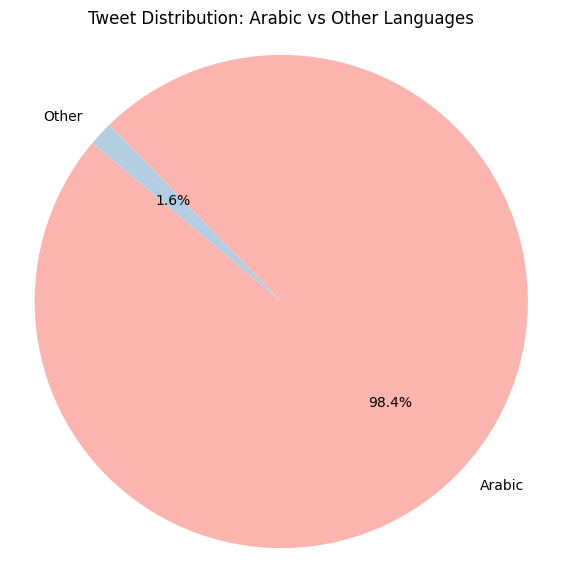

In [58]:
#@title Languages Distribution
# Count languages
language_counts = df['Language'].value_counts()

arabic_lang = 'ar'  # change if needed
arabic_count = language_counts.get(arabic_lang, 0)

# Sum of all non-Arabic languages
other_count = language_counts.sum() - arabic_count

# Create series for pie chart
pie_counts = [arabic_count, other_count]
labels = ['Arabic', 'Other']

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(pie_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Tweet Distribution: Arabic vs Other Languages')
plt.axis('equal')  # Make pie circular
plt.show()


In [59]:
# @title Remove Non-Arabic Tweets and Duplicate Tweets

# Show original shape
print(f"Original shape: {df.shape}")

# Keep only Arabic tweets, assuming 'ar' is the language code for Arabic
df = df[df['Language'] == 'ar'].reset_index(drop=True)

print(f"Shape after filtering non-Arabic tweets: {df.shape}")

# Drop duplicate tweets based on the 'Tweet Text' column (case-sensitive)
df = df.drop_duplicates(subset='Tweet Text').reset_index(drop=True)

# Show new shape
print(f"Shape after removing duplicates: {df.shape}")


Original shape: (6757, 22)
Shape after filtering non-Arabic tweets: (6649, 22)
Shape after removing duplicates: (6649, 22)


In [60]:
#@title The Duration of Events
# Group by event and get start/end dates
event_times = df.groupby('event_label')['Creation Time'].agg(['min', 'max'])

# Calculate duration in days
event_times['duration_days'] = (event_times['max'] - event_times['min']).dt.days

# Calculate duration in minutes
event_times['duration_minutes'] = ((event_times['max'] - event_times['min']).dt.total_seconds() / 60).astype(int)


# Calculate duration in hours
event_times['duration_hours'] = ((event_times['max'] - event_times['min']).dt.total_seconds() / 3600 ).astype(int)

event_times[['duration_days', 'duration_minutes', 'duration_hours']].sample(3)

,duration_days,duration_minutes,duration_hours
event_label,,,
56,0,489,8
4,2,3464,57
93,0,16,0


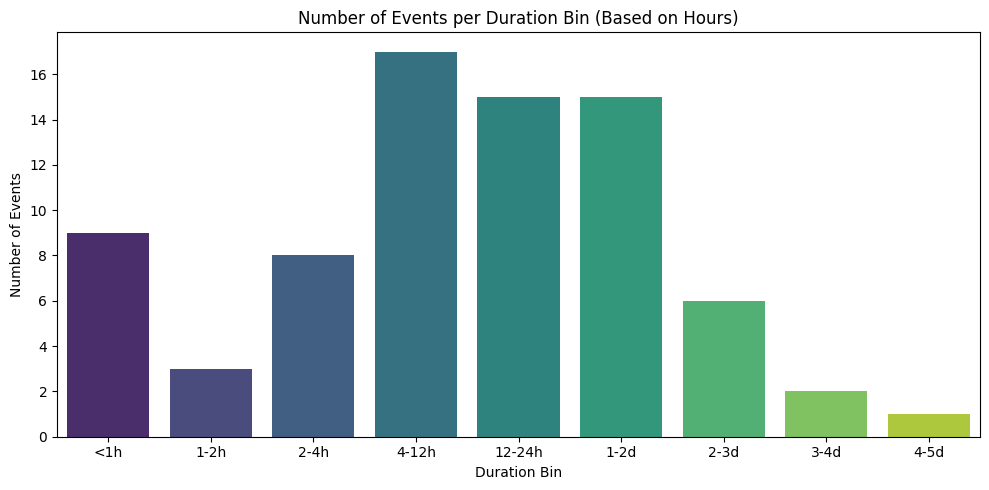

In [29]:
#@title The Duration of Events
# Define bins in hours
bins = [0, 1, 2, 4, 12, 24, 48, 72, 96, 120]  # in hours
labels = ['<1h', '1-2h', '2-4h', '4-12h', '12-24h', '1-2d', '2-3d', '3-4d', '4-5d']

# Assign duration bin based on duration_hours
event_times['duration_bin'] = pd.cut(event_times['duration_hours'], bins=bins, labels=labels, right=False)

# Count events per bin
bin_counts = event_times['duration_bin'].value_counts().sort_index()

# Plot the count of events per duration bin
plt.figure(figsize=(10, 5))
sns.barplot(
    x=bin_counts.index,
    y=bin_counts.values,
    hue=bin_counts.index,
    palette="viridis",
    legend=False
)
plt.title("Number of Events per Duration Bin (Based on Hours)")
plt.xlabel("Duration Bin")
plt.ylabel("Number of Events")
plt.tight_layout()
plt.show()


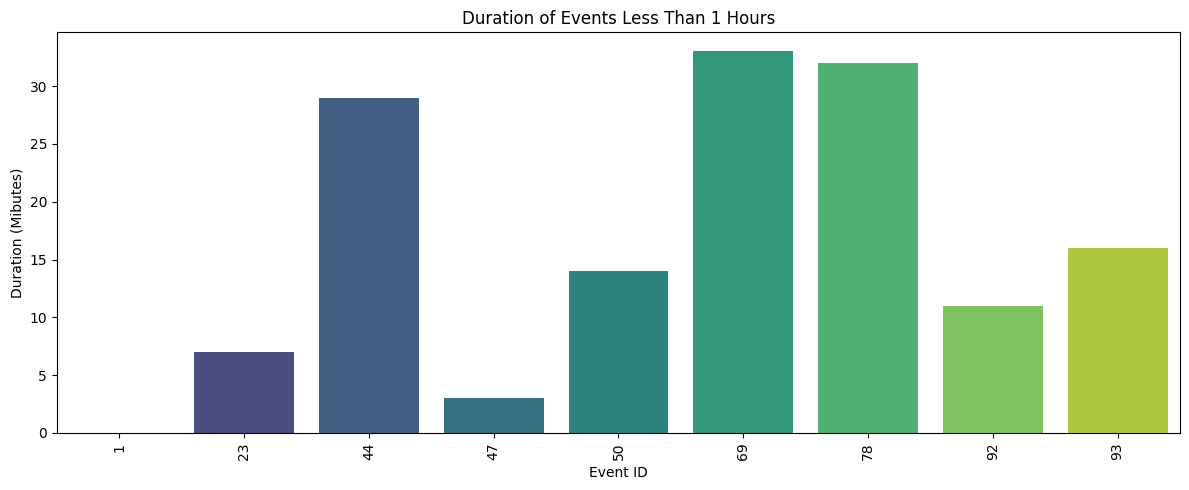

In [30]:
#@title Plot Events with Duration Less Than 2 Hours

# Filter events with duration less than 1 Hours
short_events = event_times[event_times['duration_minutes'] < 50]

# Plot the duration of short events
plt.figure(figsize=(12, 5))
sns.barplot(
    x=short_events.index.astype(str),
    y=short_events['duration_minutes'],
    hue=short_events['duration_minutes'].astype(str),
    palette="viridis",
    legend=False
)
plt.title("Duration of Events Less Than 1 Hours")
plt.xlabel("Event ID")
plt.ylabel("Duration (Mibutes)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


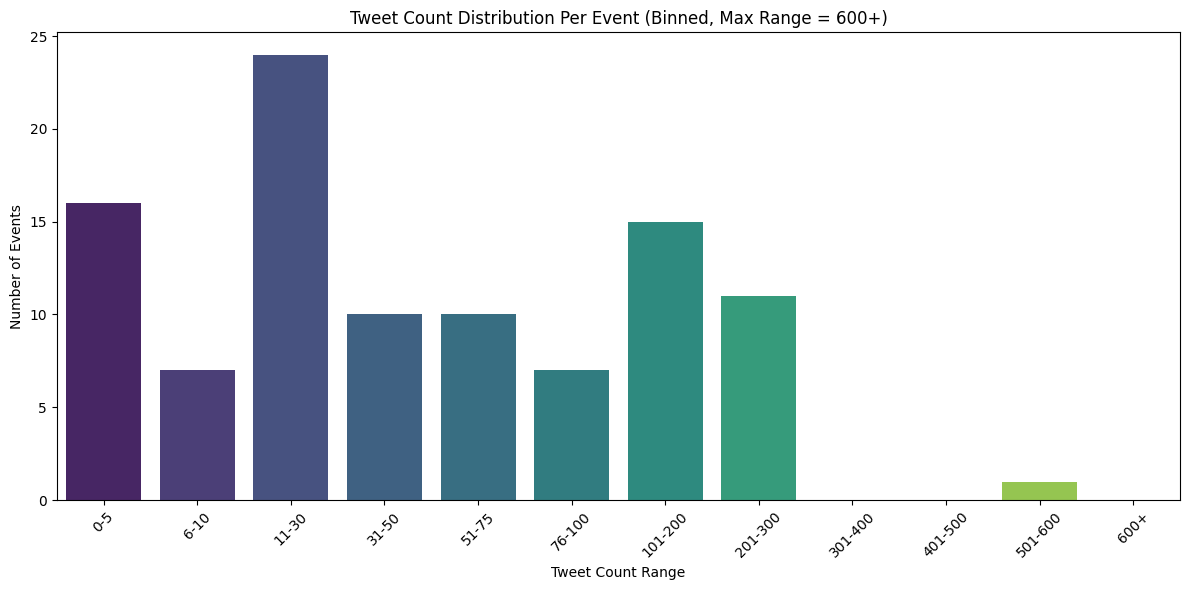

In [33]:
# @title The Number of Tweets per Event (Max Range = 600+)

# Count the number of tweets per event label
tweet_counts = df['event_label'].value_counts()

# Define bins and labels with a maximum range of 600+
bins = [0, 5, 10, 30, 50, 75, 100, 200, 300, 400, 500, 600, float('inf')]
bin_labels = ['0-5', '6-10', '11-30', '31-50', '51-75', '76-100',
              '101-200', '201-300', '301-400', '401-500', '501-600', '600+']

# Assign tweet counts to bins
tweet_counts_binned = pd.cut(tweet_counts, bins=bins, labels=bin_labels)

# Count number of events in each bin
bin_counts = tweet_counts_binned.value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(
    x=bin_counts.index,
    y=bin_counts.values,
    hue=bin_counts.index,
    palette="viridis",
    legend=False
)
plt.title("Tweet Count Distribution Per Event (Binned, Max Range = 600+)")
plt.xlabel("Tweet Count Range")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Selected event label: 70
downloading and unzipping arabic font: /usr/local/lib/python3.11/dist-packages/ar_wordcloud/fonts/NotoNaskhArabic-unhinted.zip .. 
downloading and unzipping arabic font: /usr/local/lib/python3.11/dist-packages/ar_wordcloud/fonts/NotoSansArabic-unhinted.zip .. 
downloading and unzipping arabic font: /usr/local/lib/python3.11/dist-packages/ar_wordcloud/fonts/NotoKufiArabic-unhinted.zip .. 


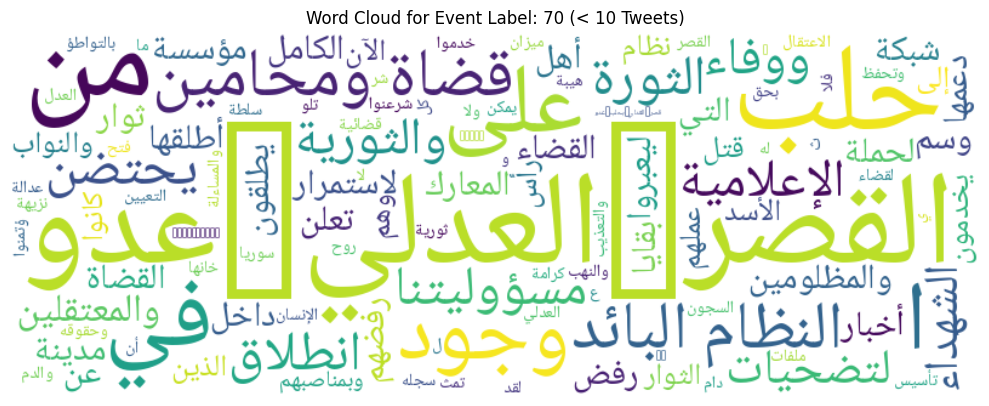

In [52]:
# @title Word Cloud for a Selected Small Event (< 10 Tweets)

import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Get events with fewer than 10 tweets
small_events = tweet_counts[tweet_counts < 10].index.tolist()

# Step 2: Select an event from the small events list
# Replace this with the event label you want to visualize
selected_event = small_events[0]  # For example, choose the first event from the list

print(f"Selected event label: {selected_event}")

# Step 3: Filter tweets for the selected event
event_df = df[df['event_label'] == selected_event]

# Step 4: Combine all tweet texts into one string
all_text = ' '.join(event_df['Tweet Text'].dropna().astype(str))

# Step 5: Reshape and apply bidi for Arabic display
reshaped_text = arabic_reshaper.reshape(all_text)
display_text = get_display(reshaped_text)

# Step 6: Generate and display the word cloud
wordcloud =  ArabicWordCloud(
            width=800,
            height=300,
            background_color='white'
        ).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Word Cloud for Event Label: {selected_event} (< 10 Tweets)")
plt.tight_layout()
plt.show()


Selected random event label: 1


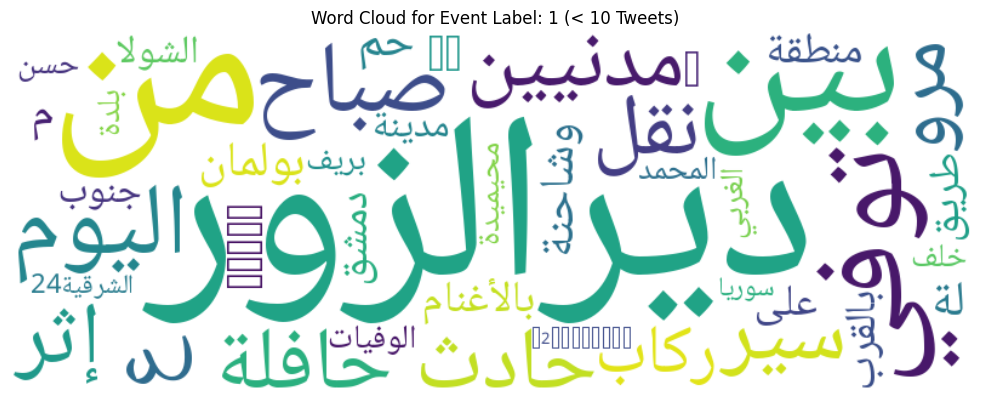

In [57]:
#@title Word Cloud For An Event


# Step 1: Find event labels in df with less than 10 tweets
event_tweet_counts = df['event_label'].value_counts()
small_events = event_tweet_counts[event_tweet_counts < 10].index.tolist()

# Step 2: Choose a random event label from those
selected_event = random.choice(small_events)
print(f"Selected random event label: {selected_event}")

# Step 3: Filter df for this event
event_df = df[df['event_label'] == selected_event]

# Step 4: Combine all tweet texts into a single string
all_text = ' '.join(event_df['Tweet Text'].dropna().astype(str))


# Step 6: Generate and display the word cloud
wordcloud = ArabicWordCloud(
    width=800,
    height=300,
    background_color='white'
).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Word Cloud for Event Label: {selected_event} (< 10 Tweets)")
plt.tight_layout()
plt.show()

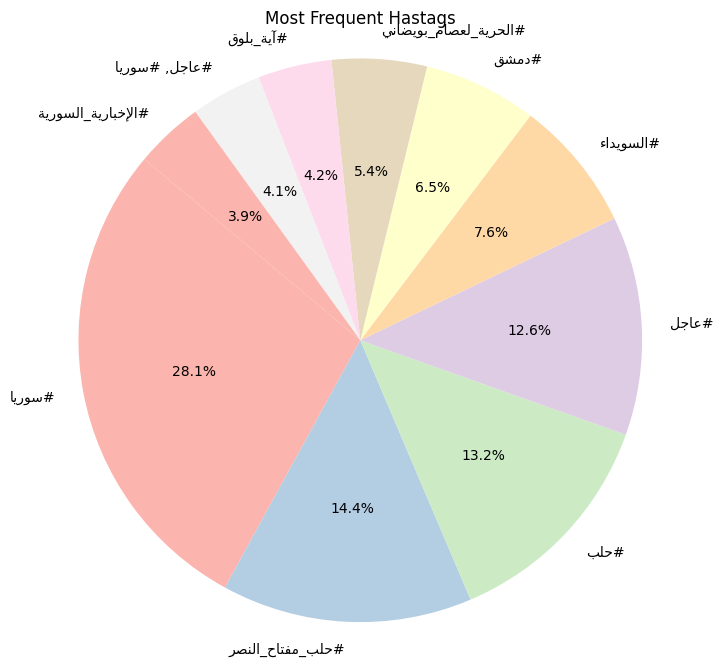

In [51]:
#@title Frequent Hashtags
# Prepare hashtag counts
all_hashtags = df['Hashtags'].dropna().apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [x])
flattened = [tag for sublist in all_hashtags for tag in sublist]
hashtag_counts = Counter(flattened)

# Extract top 10 hashtags
top_hashtags = hashtag_counts.most_common(10)
labels, counts = zip(*top_hashtags)

# Reshape and reorder Arabic labels
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in labels]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("Most Frequent Hastags")
plt.axis('equal')  # Equal aspect ratio ensures pie is circular.
plt.show()


In [65]:
#@title Extract Named Entites
from concurrent.futures import ThreadPoolExecutor

# Use ThreadPool to speed up processing
texts = df['Tweet Text'].tolist()

with ThreadPoolExecutor(max_workers=8) as executor:
    named_entities = list(executor.map(extract_entities_stanza, texts))

df['Named Entities'] = named_entities


In [66]:
#@title Some Named Entities
df['Named Entities'].sample(4)

,Named Entities
6247,"[روسيا, كوريا الشمالية]"
1049,"[دمشق, داريا]"
2416,[]
5372,"[محمد الجاسم ابو عمشة, سيف الدين ابو بكر, الجي..."


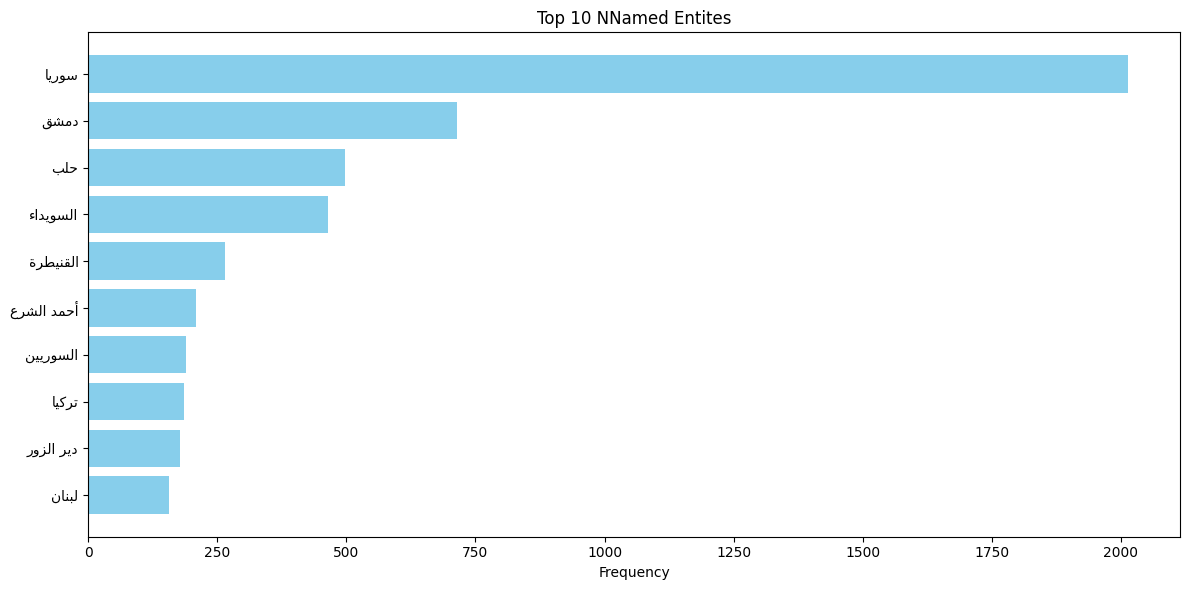

In [67]:
#@title Top Named Entities
# Flatten all named entities from the dataframe column into a single list
all_entities = [ent for sublist in df['Named Entities'] for ent in sublist]

# Count frequency of each entity
entity_counts = Counter(all_entities)

# Get top 10 entities and their counts
top_entities = entity_counts.most_common(10)
entities, counts = zip(*top_entities)

# Reshape and reorder Arabic entity labels for correct display
reshaped_entities = [get_display(arabic_reshaper.reshape(ent)) for ent in entities]

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.barh(reshaped_entities[::-1], counts[::-1], color='skyblue')  # reversed for descending order
plt.xlabel('Frequency')
plt.title("Top 10 NNamed Entites")
plt.tight_layout()
plt.show()


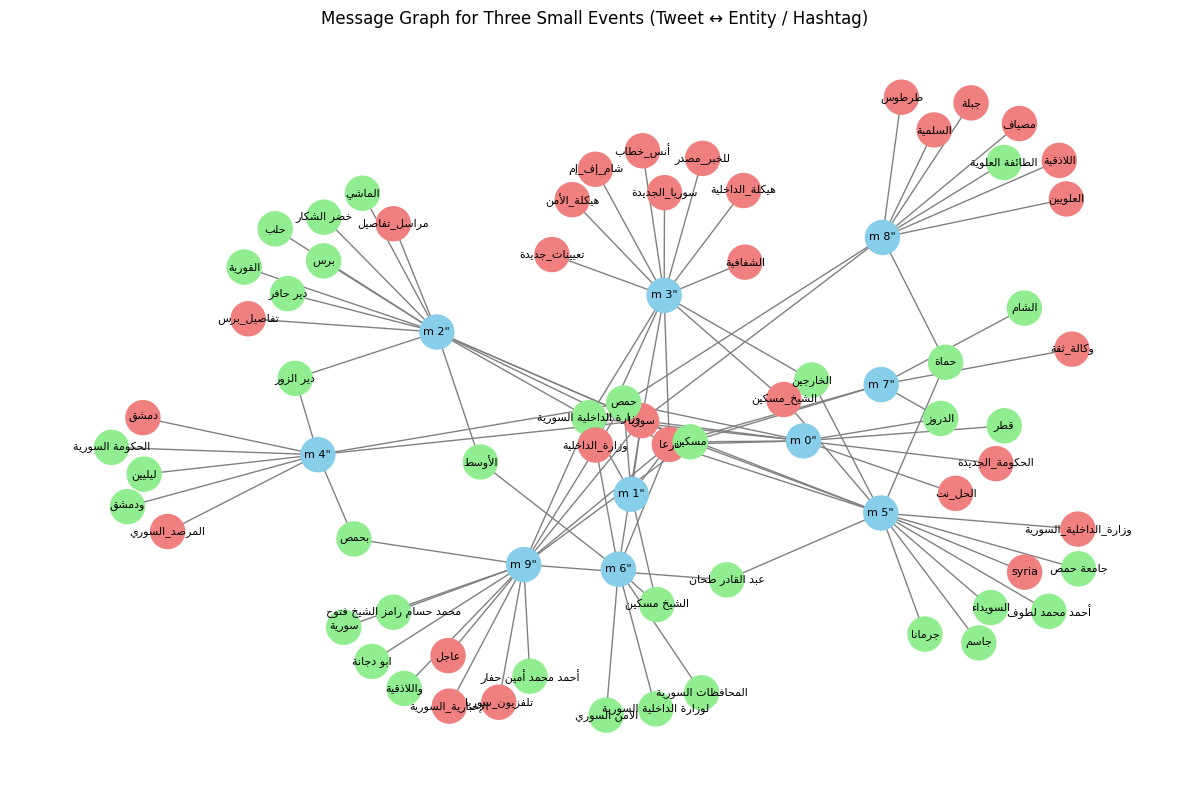

In [150]:
#@title Heterogeneous Information Graph

# Pick three small events with tweet counts between 6 and 19
small_events = tweet_counts[(tweet_counts < 15) & (tweet_counts > 10)].index.tolist()
selected_events = random.sample(small_events, 3)

# Filter tweets for those events
df_subset = df[df['event_label'].isin(selected_events)]

# Initialize the graph
G = nx.Graph()

# Add tweet nodes and connect to entities and hashtags
for idx, row in df_subset.iterrows():
    tweet_node = f"m {str(row['Tweet ID'])[-2:]}"
    G.add_node(tweet_node, label='tweet', color='skyblue')

    # Connect entities (reshape and bidi for Arabic display)
    for entity in row['Named Entities']:
        entity_text_raw = entity
        reshaped_entity = arabic_reshaper.reshape(entity_text_raw)
        entity_text = get_display(reshaped_entity)
        G.add_node(entity_text, label='entity', color='lightgreen')
        G.add_edge(tweet_node, entity_text)

    # Connect hashtags (if column exists)
    for hashtag in row['Hashtags']:
        hashtag_text_raw = f"{hashtag.lower()}"
        reshaped = arabic_reshaper.reshape(hashtag_text_raw)
        hashtag_text = get_display(reshaped)
        G.add_node(hashtag_text, label='hashtag', color='lightcoral')
        G.add_edge(tweet_node, hashtag_text)
# Draw the graph
pos = nx.spring_layout(G, seed=42)
node_colors = [data['color'] for _, data in G.nodes(data=True)]

plt.figure(figsize=(12, 8))
nx.draw_networkx(
    G, pos,
    with_labels=True,
    node_color=node_colors,
    font_size=8,
    node_size=600,
    edge_color='gray'
)
plt.title("Message Graph for Three Small Events (Tweet ↔ Entity / Hashtag)")
plt.axis('off')
plt.tight_layout()
plt.show()

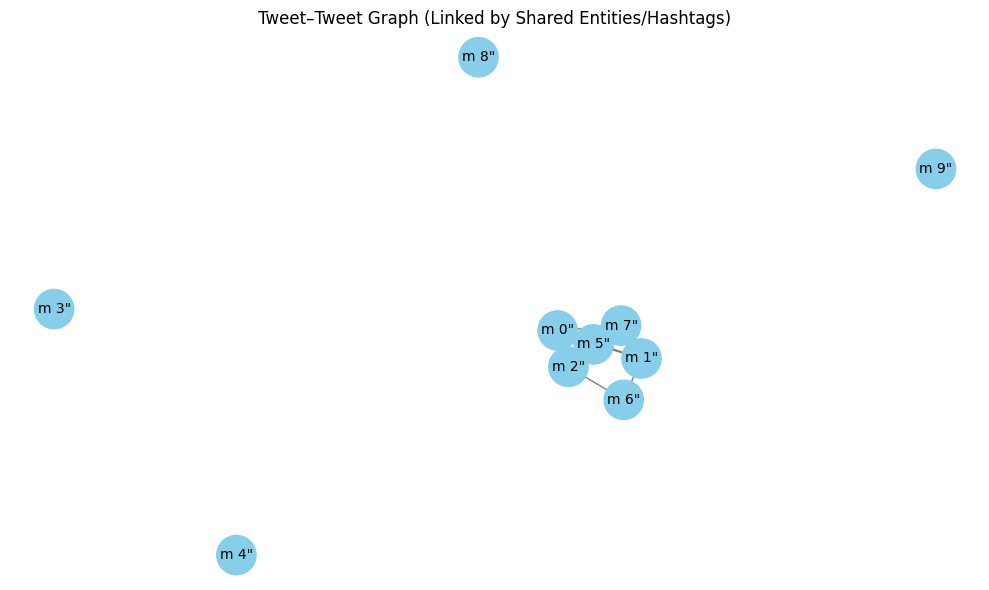

In [152]:
#@title Messages Relation Graph
# Initialize the graph
G = nx.Graph()

# Mapping from tweet node to its set of entities
tweet_entities = {}

# Build tweet nodes and store their entities
for _, row in df_subset.iterrows():
    tweet_node = f"m {str(row['Tweet ID'])[-2:]}"  # Shortened ID
    G.add_node(tweet_node, label='tweet', color='skyblue')

    # Collect text of entities (and hashtags if needed)
    entities = {e.lower() for e in row['Named Entities']}
    tweet_entities[tweet_node] = entities

# Add edges only between tweets sharing entities
tweet_nodes = list(tweet_entities.keys())
for i in range(len(tweet_nodes)):
    for j in range(i + 1, len(tweet_nodes)):
        t1, t2 = tweet_nodes[i], tweet_nodes[j]
        shared = tweet_entities[t1].intersection(tweet_entities[t2])
        if shared:
            G.add_edge(t1, t2, shared_entities=', '.join(shared))

# Draw the simplified tweet-only graph
pos = nx.spring_layout(G, seed=42)
node_colors = [data['color'] for _, data in G.nodes(data=True)]

plt.figure(figsize=(10, 6))
nx.draw_networkx(
    G, pos,
    with_labels=True,
    node_color=node_colors,
    font_size=10,
    node_size=800,
    edge_color='gray'
)
plt.title("Tweet–Tweet Graph (Linked by Shared Entities/Hashtags)")
plt.axis('off')
plt.tight_layout()
plt.show()


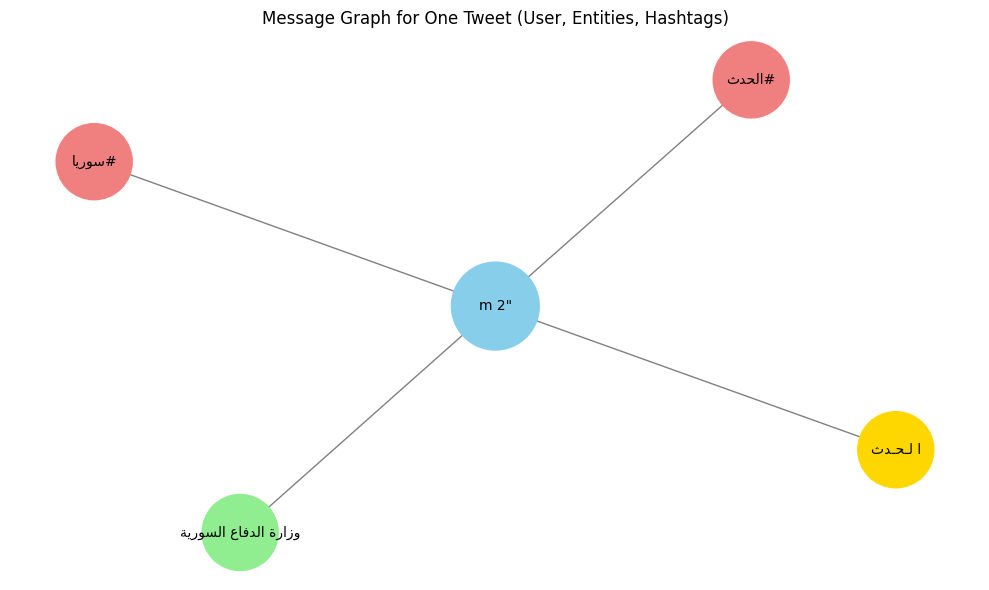

In [156]:
#@title Message Graph for One Tweet (Arabic reshaped)

import arabic_reshaper
from bidi.algorithm import get_display

# Filter small events and pick one tweet
df_small = df[df['event_label'].isin(small_events)]

# Choose one tweet from this subset
one_tweet = df.sample(1).iloc[0]

# Initialize the graph
G = nx.Graph()
tweet_node = f"m {str(one_tweet['Tweet ID'])[-2:]}"  # Short ID

# Reshape and display author name in Arabic
user_raw = one_tweet['Author Name']
reshaped_user = arabic_reshaper.reshape(str(user_raw))
user_node = get_display(reshaped_user)

# Add tweet node
G.add_node(tweet_node, label='tweet', color='skyblue', size=4000)

# Add user node and connect
G.add_node(user_node, label='user', color='gold', size=3000)
G.add_edge(user_node, tweet_node)

# Add entity nodes and edges
for entity in one_tweet['Named Entities']:
    raw_entity = entity.strip().lower()
    reshaped_entity = arabic_reshaper.reshape(raw_entity)
    entity_text = get_display(reshaped_entity)
    G.add_node(entity_text, label='entity', color='lightgreen', size=3000)
    G.add_edge(tweet_node, entity_text)

# Add hashtag nodes and edges
for hashtag in one_tweet.get('Hashtags', []):
    raw_hashtag = f"#{hashtag.lower()}"
    reshaped_hashtag = arabic_reshaper.reshape(raw_hashtag)
    hashtag_text = get_display(reshaped_hashtag)
    G.add_node(hashtag_text, label='hashtag', color='lightcoral', size=3000)
    G.add_edge(tweet_node, hashtag_text)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
node_colors = [data['color'] for _, data in G.nodes(data=True)]
node_sizes = [data['size'] for _, data in G.nodes(data=True)]

plt.figure(figsize=(10, 6))
nx.draw_networkx(
    G, pos,
    with_labels=True,
    node_color=node_colors,
    node_size=node_sizes,
    font_size=10,
    edge_color='gray'
)
plt.title("Message Graph for One Tweet (User, Entities, Hashtags)")
plt.axis('off')
plt.tight_layout()
plt.show()


In [157]:
#@title Save the dataset
df.to_csv('/content/drive/MyDrive/cleaned_merged_labeled_events.csv', index=False)
df.to_csv('/content/drive/MyDrive/merged_labeled_events.csv', index=False)


## Conclusion

## Refrences
